<a href="https://colab.research.google.com/github/martynawl/data-science-bootcamp/blob/main/03_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pandas

In [ ]:
import pandas as pd
pd.__version__

'1.3.5'

Podstawowe struktury danych: pd.Series

In [ ]:
s = pd.Series(data=[3, 2, 4, 6])
s

0    3
1    2
2    4
3    6
dtype: int64

In [ ]:
s = pd.Series(data=[3, 2, 4, 6], index=['a', 'b', 'c', 'd'], name='sample')
s

a    3
b    2
c    4
d    6
Name: sample, dtype: int64

In [ ]:
import numpy as np

s = pd.Series(data=[3., np.nan, 4, 6], index=['a', 'b', 'c', 'c'], name='sample')
s

a    3.0
b    NaN
c    4.0
c    6.0
Name: sample, dtype: float64

In [ ]:
s = pd.Series(data=[True, False, False])
s

0     True
1    False
2    False
dtype: bool

In [ ]:
s = pd.Series(data=np.arange(10, 20), index=pd.date_range(start='20200101', periods=10))
s

2020-01-01    10
2020-01-02    11
2020-01-03    12
2020-01-04    13
2020-01-05    14
2020-01-06    15
2020-01-07    16
2020-01-08    17
2020-01-09    18
2020-01-10    19
Freq: D, dtype: int64

In [ ]:
list(s.index)

[Timestamp('2020-01-01 00:00:00', freq='D'),
 Timestamp('2020-01-02 00:00:00', freq='D'),
 Timestamp('2020-01-03 00:00:00', freq='D'),
 Timestamp('2020-01-04 00:00:00', freq='D'),
 Timestamp('2020-01-05 00:00:00', freq='D'),
 Timestamp('2020-01-06 00:00:00', freq='D'),
 Timestamp('2020-01-07 00:00:00', freq='D'),
 Timestamp('2020-01-08 00:00:00', freq='D'),
 Timestamp('2020-01-09 00:00:00', freq='D'),
 Timestamp('2020-01-10 00:00:00', freq='D')]

In [ ]:
s.dtypes

dtype('int64')

Tworzenie obiektów cz.2

In [ ]:
s = pd.Series(data=['python', 'java', 'sql'], name='languages')
s

0    python
1      java
2       sql
Name: languages, dtype: object

In [ ]:
type(s)

pandas.core.series.Series

In [ ]:
s.index

RangeIndex(start=0, stop=3, step=1)

In [ ]:
s.values

array(['python', 'java', 'sql'], dtype=object)

In [ ]:
s.dtypes

dtype('O')

In [ ]:
s.shape

(10,)

Praca z obiektem

In [ ]:
price = pd.Series(data={'Apple': 200, 'CD Project': 60, 'Amazon': 1000, 'KGHM': np.nan})
price

Apple          200.0
CD Project      60.0
Amazon        1000.0
KGHM             NaN
dtype: float64

In [ ]:
price['CD Project']

60

In [ ]:
price[1]

60

In [ ]:
price.count()

3

In [ ]:
price.value_counts(dropna=False)

200.0     1
60.0      1
1000.0    1
NaN       1
dtype: int64

In [ ]:
price.sum()

1260

In [ ]:
price.min()

60

In [ ]:
price.max()

1000

In [ ]:
price.std()

507.14889332423866

In [ ]:
price.describe()

count       3.000000
mean      420.000000
std       507.148893
min        60.000000
25%       130.000000
50%       200.000000
75%       600.000000
max      1000.000000
dtype: float64

In [ ]:
price.nlargest(2)

Amazon    1000.0
Apple      200.0
dtype: float64

In [ ]:
price.nsmallest(1)

CD Project    60.0
dtype: float64

In [ ]:
price.rank()

Apple         2.0
CD Project    1.0
Amazon        3.0
KGHM          NaN
dtype: float64

In [ ]:
price.sort_values()

CD Project      60.0
Apple          200.0
Amazon        1000.0
KGHM             NaN
dtype: float64

In [ ]:
price.sort_values(ascending=False)

Amazon        1000.0
Apple          200.0
CD Project      60.0
KGHM             NaN
dtype: float64

Metoda apply()

In [ ]:
price_pln = price.apply(lambda x: x * 3.8)

In [ ]:
price

Apple          200.0
CD Project      60.0
Amazon        1000.0
KGHM             NaN
dtype: float64

DataFrame: tworzenie obiektów

In [ ]:
df = pd.DataFrame(data=[12, 12, 32])
df

,0
0,12
1,12
2,32


In [ ]:
df = pd.DataFrame(data=[12, 12, 32], index=['first', 'second', 'third'], columns=['col_1'])
df

,col_1
first,12
second,12
third,32


In [ ]:
df = pd.DataFrame(data={'WIG20': ['PKN ORLEN', 'PKO BP'],
                        'mWIG40': ['Amica', 'Playway']})
df

,WIG20,mWIG40
0,PKN ORLEN,Amica
1,PKO BP,Playway


In [ ]:
df = pd.DataFrame(data=[[10, 12, 13], [23, 12, 10]], index=['first', 'second'], columns=['col_1', 'col_2', 'col_3'])
df

,col_1,col_2,col_3
first,10,12,13
second,23,12,10


In [ ]:
df.columns

Index(['col_1', 'col_2', 'col_3'], dtype='object')

In [ ]:
df.index

Index(['first', 'second'], dtype='object')

In [ ]:
df.values

array([[10, 12, 13],
       [23, 12, 10]])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, first to second
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   col_1   2 non-null      int64
 1   col_2   2 non-null      int64
 2   col_3   2 non-null      int64
dtypes: int64(3)
memory usage: 172.0+ bytes


In [ ]:
df.describe()

,col_1,col_2,col_3
count,2.000000,2.0,2.00000
mean,16.500000,12.0,11.50000
std,9.192388,0.0,2.12132
min,10.000000,12.0,10.00000
25%,13.250000,12.0,10.75000
50%,16.500000,12.0,11.50000
75%,19.750000,12.0,12.25000
max,23.000000,12.0,13.00000


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
col_1,2.0,16.5,9.192388,10.0,13.25,16.5,19.75,23.0
col_2,2.0,12.0,0.000000,12.0,12.00,12.0,12.00,12.0
col_3,2.0,11.5,2.121320,10.0,10.75,11.5,12.25,13.0


DataFrame: selekcja kolumn

In [ ]:
df

,col_1,col_2,col_3
first,10,12,13
second,23,12,10


In [ ]:
df['col_1']

first     10
second    23
Name: col_1, dtype: int64

In [ ]:
type(df['col_1'])

pandas.core.series.Series

In [ ]:
df[['col_1']]

,col_1
first,10
second,23


In [ ]:
type(df[['col_1']])

pandas.core.frame.DataFrame

In [ ]:
df.columns = ['a', 'sprzedaz_grudzien', 'c']
df

,a,sprzedaz_grudzien,c
first,10,12,13
second,23,12,10


In [ ]:
df.a

first     10
second    23
Name: a, dtype: int64

In [ ]:
df.sprzedaz_grudzien

first     12
second    12
Name: sprzedaz_grudzien, dtype: int64

In [ ]:
df['d'] = df.a + df.c
df

,a,sprzedaz_grudzien,c,d
first,10,12,13,23
second,23,12,10,33


In [ ]:
df = pd.DataFrame(data=[[10, 12, 13], [23, 12, 10]], index=['first', 'second'], columns=['col_1', 'col_2', 'col_3'])
df

,col_1,col_2,col_3
first,10,12,13
second,23,12,10


In [ ]:
df.loc['first']

col_1    10
col_2    12
col_3    13
Name: first, dtype: int64

In [ ]:
df.loc['first', 'col_2']

12

In [ ]:
df.loc[:, 'col_2']

first     12
second    12
Name: col_2, dtype: int64

In [ ]:
df.iloc[0]

col_1    10
col_2    12
col_3    13
Name: first, dtype: int64

In [ ]:
df.iloc[0, 1]

12

Dane giełdowe cz.1

In [ ]:
import numpy as np
import pandas as pd

print(f'Numpy: {np.__version__}')
print(f'Pandas: {pd.__version__}')

Numpy: 1.21.6
Pandas: 1.3.5


In [ ]:
def fetch_financial_data(company='AMZN'):
    """Pobiera dane dotyczące notowań spółek na giełdzie według symboli na serwisie stooq.pl"""
    import pandas_datareader.data as web
    return web.DataReader(name=company, data_source='stooq')

df = fetch_financial_data()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2022-06-30 to 2017-07-03
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
 1   High    1258 non-null   float64
 2   Low     1258 non-null   float64
 3   Close   1258 non-null   float64
 4   Volume  1258 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 59.0 KB


In [ ]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2022-06-30,108.1100,108.1800,102.5200,106.2100,97679401
2022-06-29,107.3800,110.9900,106.9100,108.9200,66375341
2022-06-28,113.5000,114.8500,107.0400,107.4000,75172028
2022-06-27,117.0900,117.9800,112.7000,113.2200,62133240
2022-06-24,112.3800,116.7100,111.4300,116.4600,69867618
...,...,...,...,...,...
2017-07-10,49.2500,49.9720,49.1750,49.8235,70775340
2017-07-07,48.4775,49.0055,48.4570,48.9380,52101760
2017-07-06,48.2330,48.7200,47.9510,48.2570,65148760


In [ ]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2022-06-30,108.11,108.18,102.52,106.21,97679401
2022-06-29,107.38,110.99,106.91,108.92,66375341
2022-06-28,113.50,114.85,107.04,107.40,75172028
2022-06-27,117.09,117.98,112.70,113.22,62133240
2022-06-24,112.38,116.71,111.43,116.46,69867618


In [ ]:
df.head(10)

,Open,High,Low,Close,Volume
Date,,,,,
2022-06-30,108.11,108.1800,102.52,106.21,97679401
2022-06-29,107.38,110.9900,106.91,108.92,66375341
2022-06-28,113.50,114.8500,107.04,107.40,75172028
2022-06-27,117.09,117.9800,112.70,113.22,62133240
2022-06-24,112.38,116.7100,111.43,116.46,69867618
2022-06-23,110.39,113.0000,107.93,112.44,64345300
2022-06-22,107.43,112.1300,107.02,108.95,60040131
2022-06-21,108.20,111.6299,103.56,108.68,70901245
2022-06-17,102.80,106.9800,102.51,106.22,99772147


In [ ]:
df.head(3)

,Open,High,Low,Close,Volume
Date,,,,,
2022-06-30,108.11,108.18,102.52,106.21,97679401
2022-06-29,107.38,110.99,106.91,108.92,66375341
2022-06-28,113.50,114.85,107.04,107.40,75172028


In [ ]:
df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2017-07-10,49.2500,49.9720,49.1750,49.8235,70775340
2017-07-07,48.4775,49.0055,48.4570,48.9380,52101760
2017-07-06,48.2330,48.7200,47.9510,48.2570,65148760
2017-07-05,48.0765,48.7500,47.7625,48.5700,72982060
2017-07-03,48.6395,48.7245,47.5500,47.6830,58182160


In [ ]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [ ]:
df.columns = [col.lower() for col in df.columns]
df.head()

,open,high,low,close,volume
Date,,,,,
2022-06-30,108.11,108.18,102.52,106.21,97679401
2022-06-29,107.38,110.99,106.91,108.92,66375341
2022-06-28,113.50,114.85,107.04,107.40,75172028
2022-06-27,117.09,117.98,112.70,113.22,62133240
2022-06-24,112.38,116.71,111.43,116.46,69867618


In [ ]:
df.describe()

,open,high,low,close,volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,113.817386,115.106473,112.367195,113.745885,8.657807e+07
std,40.760044,41.250217,40.201184,40.685859,4.119576e+07
min,47.000000,47.431500,46.587500,46.930000,1.762674e+07
25%,84.012500,85.002125,83.064000,83.844750,5.877207e+07
50%,96.712500,97.800000,95.525000,96.935750,7.497995e+07
75%,158.328500,159.931000,156.225000,158.093500,1.024317e+08
max,187.200000,188.654000,184.840000,186.570000,3.310520e+08


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
open,1258.0,1.138174e+02,4.076004e+01,4.700000e+01,8.401250e+01,9.671250e+01,1.583285e+02,1.872000e+02
high,1258.0,1.151065e+02,4.125022e+01,4.743150e+01,8.500213e+01,9.780000e+01,1.599310e+02,1.886540e+02
low,1258.0,1.123672e+02,4.020118e+01,4.658750e+01,8.306400e+01,9.552500e+01,1.562250e+02,1.848400e+02
close,1258.0,1.137459e+02,4.068586e+01,4.693000e+01,8.384475e+01,9.693575e+01,1.580935e+02,1.865700e+02
volume,1258.0,8.657807e+07,4.119576e+07,1.762674e+07,5.877207e+07,7.497995e+07,1.024317e+08,3.310520e+08


Selekcja kolumn

In [ ]:
df = df.head(10)
df

,open,high,low,close,volume
Date,,,,,
2022-06-30,108.11,108.1800,102.52,106.21,97679401
2022-06-29,107.38,110.9900,106.91,108.92,66375341
2022-06-28,113.50,114.8500,107.04,107.40,75172028
2022-06-27,117.09,117.9800,112.70,113.22,62133240
2022-06-24,112.38,116.7100,111.43,116.46,69867618
2022-06-23,110.39,113.0000,107.93,112.44,64345300
2022-06-22,107.43,112.1300,107.02,108.95,60040131
2022-06-21,108.20,111.6299,103.56,108.68,70901245
2022-06-17,102.80,106.9800,102.51,106.22,99772147


In [ ]:
df['open']

Date
2022-06-30    108.11
2022-06-29    107.38
2022-06-28    113.50
2022-06-27    117.09
2022-06-24    112.38
2022-06-23    110.39
2022-06-22    107.43
2022-06-21    108.20
2022-06-17    102.80
2022-06-16    104.47
Name: open, dtype: float64

In [ ]:
df.open

Date
2022-06-30    108.11
2022-06-29    107.38
2022-06-28    113.50
2022-06-27    117.09
2022-06-24    112.38
2022-06-23    110.39
2022-06-22    107.43
2022-06-21    108.20
2022-06-17    102.80
2022-06-16    104.47
Name: open, dtype: float64

In [ ]:
df[['open', 'close']]

,open,close
Date,,
2022-06-30,108.11,106.21
2022-06-29,107.38,108.92
2022-06-28,113.50,107.40
2022-06-27,117.09,113.22
2022-06-24,112.38,116.46
2022-06-23,110.39,112.44
2022-06-22,107.43,108.95
2022-06-21,108.20,108.68
2022-06-17,102.80,106.22


In [ ]:
df.iloc[:, 0]

Date
2022-06-30    108.11
2022-06-29    107.38
2022-06-28    113.50
2022-06-27    117.09
2022-06-24    112.38
2022-06-23    110.39
2022-06-22    107.43
2022-06-21    108.20
2022-06-17    102.80
2022-06-16    104.47
Name: open, dtype: float64

In [ ]:
df.iloc[:, 3:5]

,close,volume
Date,,
2022-06-30,106.21,97679401
2022-06-29,108.92,66375341
2022-06-28,107.40,75172028
2022-06-27,113.22,62133240
2022-06-24,116.46,69867618
2022-06-23,112.44,64345300
2022-06-22,108.95,60040131
2022-06-21,108.68,70901245
2022-06-17,106.22,99772147


In [ ]:
df.iloc[:, [-1]]

,volume
Date,
2022-06-30,97679401
2022-06-29,66375341
2022-06-28,75172028
2022-06-27,62133240
2022-06-24,69867618
2022-06-23,64345300
2022-06-22,60040131
2022-06-21,70901245
2022-06-17,99772147


In [ ]:
df.iloc[:, -3:]

,low,close,volume
Date,,,
2022-06-30,102.52,106.21,97679401
2022-06-29,106.91,108.92,66375341
2022-06-28,107.04,107.40,75172028
2022-06-27,112.70,113.22,62133240
2022-06-24,111.43,116.46,69867618
2022-06-23,107.93,112.44,64345300
2022-06-22,107.02,108.95,60040131
2022-06-21,103.56,108.68,70901245
2022-06-17,102.51,106.22,99772147


In [ ]:
df

,open,high,low,close,volume
Date,,,,,
2022-06-30,108.11,108.1800,102.52,106.21,97679401
2022-06-29,107.38,110.9900,106.91,108.92,66375341
2022-06-28,113.50,114.8500,107.04,107.40,75172028
2022-06-27,117.09,117.9800,112.70,113.22,62133240
2022-06-24,112.38,116.7100,111.43,116.46,69867618
2022-06-23,110.39,113.0000,107.93,112.44,64345300
2022-06-22,107.43,112.1300,107.02,108.95,60040131
2022-06-21,108.20,111.6299,103.56,108.68,70901245
2022-06-17,102.80,106.9800,102.51,106.22,99772147


In [ ]:
df.iloc[0]

open           108.11
high           108.18
low            102.52
close          106.21
volume    97679401.00
Name: 2022-06-30 00:00:00, dtype: float64

In [ ]:
df.iloc[:3]

,open,high,low,close,volume
Date,,,,,
2022-06-30,108.11,108.18,102.52,106.21,97679401
2022-06-29,107.38,110.99,106.91,108.92,66375341
2022-06-28,113.50,114.85,107.04,107.40,75172028


In [ ]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2022-06-30,108.1100,108.1800,102.5200,106.2100,97679401
2022-06-29,107.3800,110.9900,106.9100,108.9200,66375341
2022-06-28,113.5000,114.8500,107.0400,107.4000,75172028
2022-06-27,117.0900,117.9800,112.7000,113.2200,62133240
2022-06-24,112.3800,116.7100,111.4300,116.4600,69867618
...,...,...,...,...,...
2017-07-10,49.2500,49.9720,49.1750,49.8235,70775340
2017-07-07,48.4775,49.0055,48.4570,48.9380,52101760
2017-07-06,48.2330,48.7200,47.9510,48.2570,65148760


In [ ]:
df.loc['2017-07-03': '2017-07-10']

,Open,High,Low,Close,Volume
Date,,,,,
2017-07-10,49.2500,49.9720,49.1750,49.8235,70775340
2017-07-07,48.4775,49.0055,48.4570,48.9380,52101760
2017-07-06,48.2330,48.7200,47.9510,48.2570,65148760
2017-07-05,48.0765,48.7500,47.7625,48.5700,72982060


Obliczanie nowych kolumn

In [ ]:
df = fetch_financial_data("UBER")
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 792 entries, 2022-06-30 to 2019-05-10
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    792 non-null    float64
 1   High    792 non-null    float64
 2   Low     792 non-null    float64
 3   Close   792 non-null    float64
 4   Volume  792 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 37.1 KB


In [ ]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2022-06-30,21.11,21.1255,19.895,20.46,30882454
2022-06-29,22.11,22.1500,21.080,21.47,30704792
2022-06-28,22.97,23.4600,22.040,22.08,24360150
2022-06-27,23.45,23.6400,22.345,22.86,27153354
2022-06-24,22.48,23.1900,22.300,23.03,38140098


In [ ]:
df.describe()

,Open,High,Low,Close,Volume
count,792.000000,792.000000,792.000000,792.000000,7.920000e+02
mean,39.083514,39.869144,38.187618,39.017652,2.555253e+07
std,9.610746,9.675584,9.490402,9.569969,1.698055e+07
min,15.960000,17.800000,13.710000,14.820000,3.380003e+06
25%,31.972500,32.797150,31.160000,32.030000,1.509386e+07
50%,37.185000,37.945000,36.377500,37.130000,2.165904e+07
75%,45.722500,46.660000,44.992500,45.730000,3.144676e+07
max,63.250000,64.050000,60.800000,63.180000,1.863225e+08


In [ ]:
df.head(3)

,Open,High,Low,Close,Volume
Date,,,,,
2022-06-30,21.11,21.1255,19.895,20.46,30882454
2022-06-29,22.11,22.1500,21.080,21.47,30704792
2022-06-28,22.97,23.4600,22.040,22.08,24360150


In [ ]:
df['Averange'] = (df.Open + df.Close) / 2.0
df.head()

,Open,High,Low,Close,Volume,Averange
Date,,,,,,
2022-06-30,21.11,21.1255,19.895,20.46,30882454,20.785
2022-06-29,22.11,22.1500,21.080,21.47,30704792,21.790
2022-06-28,22.97,23.4600,22.040,22.08,24360150,22.525
2022-06-27,23.45,23.6400,22.345,22.86,27153354,23.155
2022-06-24,22.48,23.1900,22.300,23.03,38140098,22.755


In [ ]:
df.sort_index()

,Open,High,Low,Close,Volume,Averange
Date,,,,,,
2019-05-10,42.00,45.0000,41.060,41.57,186322536,41.785
2019-05-13,38.79,39.2400,36.080,37.10,79442420,37.945
2019-05-14,38.31,39.9600,36.850,39.96,46661147,39.135
2019-05-15,39.37,41.8800,38.950,41.29,36086065,40.330
2019-05-16,41.48,44.0600,41.250,43.00,38115524,42.240
...,...,...,...,...,...,...
2022-06-24,22.48,23.1900,22.300,23.03,38140098,22.755
2022-06-27,23.45,23.6400,22.345,22.86,27153354,23.155
2022-06-28,22.97,23.4600,22.040,22.08,24360150,22.525


In [ ]:
df = df.sort_index()
df.head()

,Open,High,Low,Close,Volume,Averange
Date,,,,,,
2019-05-10,42.00,45.00,41.06,41.57,186322536,41.785
2019-05-13,38.79,39.24,36.08,37.10,79442420,37.945
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240


In [ ]:
df[['Close']].shift(3)

,Close
Date,
2019-05-10,NaN
2019-05-13,NaN
2019-05-14,NaN
2019-05-15,41.57
2019-05-16,37.10
...,...
2022-06-24,21.76
2022-06-27,21.50
2022-06-28,22.37


In [ ]:
df = df.sort_index()
df.head()

,Open,High,Low,Close,Volume,Averange
Date,,,,,,
2019-05-10,42.00,45.00,41.06,41.57,186322536,41.785
2019-05-13,38.79,39.24,36.08,37.10,79442420,37.945
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240


In [ ]:
df['Close_shift'] = df.Close.shift(1)
df.head()

,Open,High,Low,Close,Volume,Averange,Close_shift
Date,,,,,,,
2019-05-10,42.00,45.00,41.06,41.57,186322536,41.785,NaN
2019-05-13,38.79,39.24,36.08,37.10,79442420,37.945,41.57
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330,39.96
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240,41.29


In [ ]:
df['Daily_Change'] = df.Close / df.Close_shift - 1
df.head()

,Open,High,Low,Close,Volume,Averange,Close_shift,Daily Change,Daily_Change
Date,,,,,,,,,
2019-05-10,42.00,45.00,41.06,41.57,186322536,41.785,NaN,NaN,NaN
2019-05-13,38.79,39.24,36.08,37.10,79442420,37.945,41.57,-0.107529,-0.107529
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10,0.077089,0.077089
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330,39.96,0.033283,0.033283
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240,41.29,0.041414,0.041414


In [ ]:
del df['Daily Change']
df.head()

,Open,High,Low,Close,Volume,Averange,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-10,42.00,45.00,41.06,41.57,186322536,41.785,NaN,NaN
2019-05-13,38.79,39.24,36.08,37.10,79442420,37.945,41.57,-0.107529
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10,0.077089
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330,39.96,0.033283
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240,41.29,0.041414


In [ ]:
df.Daily_Change.min()

-0.21628767847699626

In [ ]:
df.Daily_Change.max()

0.3825910931174088

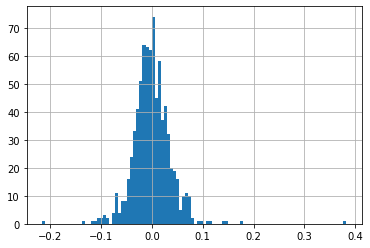

In [ ]:
df.Daily_Change.hist(bins=100)

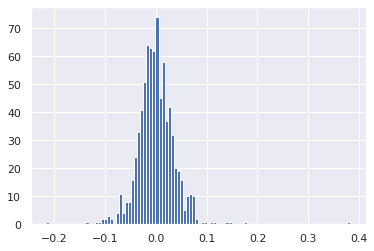

In [ ]:
import seaborn as sns
sns.set()
df.Daily_Change.hist(bins=100)

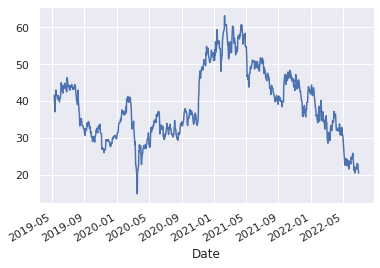

In [ ]:
df.Close.plot()

Filtrowanie danych

In [ ]:
df

,Open,High,Low,Close,Volume,Averange,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-10,42.00,45.0000,41.060,41.57,186322536,41.785,NaN,NaN
2019-05-13,38.79,39.2400,36.080,37.10,79442420,37.945,41.57,-0.107529
2019-05-14,38.31,39.9600,36.850,39.96,46661147,39.135,37.10,0.077089
2019-05-15,39.37,41.8800,38.950,41.29,36086065,40.330,39.96,0.033283
2019-05-16,41.48,44.0600,41.250,43.00,38115524,42.240,41.29,0.041414
...,...,...,...,...,...,...,...,...
2022-06-24,22.48,23.1900,22.300,23.03,38140098,22.755,22.37,0.029504
2022-06-27,23.45,23.6400,22.345,22.86,27153354,23.155,23.03,-0.007382
2022-06-28,22.97,23.4600,22.040,22.08,24360150,22.525,22.86,-0.034121


In [ ]:
df.Daily_Change > 0

Date
2019-05-10    False
2019-05-13    False
2019-05-14     True
2019-05-15     True
2019-05-16     True
              ...  
2022-06-24     True
2022-06-27    False
2022-06-28    False
2022-06-29    False
2022-06-30    False
Name: Daily_Change, Length: 792, dtype: bool

In [ ]:
df[df.Daily_Change > 0]

,Open,High,Low,Close,Volume,Averange,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10,0.077089
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330,39.96,0.033283
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240,41.29,0.041414
2019-05-24,41.28,41.51,40.50,41.51,8786751,41.395,40.47,0.025698
2019-05-31,41.15,41.57,39.41,40.41,23209848,40.780,39.80,0.015327
...,...,...,...,...,...,...,...,...
2022-06-08,25.70,26.55,25.30,25.83,31225314,25.765,25.30,0.020949
2022-06-15,21.34,22.39,21.24,22.03,36073711,21.685,21.09,0.044571
2022-06-17,20.37,21.96,20.37,21.81,46728428,21.090,20.47,0.065462


In [ ]:
df[df.Daily_Change < 0]

,Open,High,Low,Close,Volume,Averange,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-13,38.79,39.2400,36.080,37.10,79442420,37.945,41.57,-0.107529
2019-05-17,41.98,43.2900,41.270,41.91,20225687,41.945,43.00,-0.025349
2019-05-20,41.19,41.6800,39.460,41.59,29222330,41.390,41.91,-0.007635
2019-05-21,42.00,42.2400,41.250,41.50,10802851,41.750,41.59,-0.002164
2019-05-22,41.05,41.2800,40.500,41.25,9089469,41.150,41.50,-0.006024
...,...,...,...,...,...,...,...,...
2022-06-22,21.41,22.2100,21.300,21.50,32353317,21.455,21.76,-0.011949
2022-06-27,23.45,23.6400,22.345,22.86,27153354,23.155,23.03,-0.007382
2022-06-28,22.97,23.4600,22.040,22.08,24360150,22.525,22.86,-0.034121


In [ ]:
df_positive = df[df.Daily_Change > 0]
df_positive

,Open,High,Low,Close,Volume,Averange,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10,0.077089
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330,39.96,0.033283
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240,41.29,0.041414
2019-05-24,41.28,41.51,40.50,41.51,8786751,41.395,40.47,0.025698
2019-05-31,41.15,41.57,39.41,40.41,23209848,40.780,39.80,0.015327
...,...,...,...,...,...,...,...,...
2022-06-08,25.70,26.55,25.30,25.83,31225314,25.765,25.30,0.020949
2022-06-15,21.34,22.39,21.24,22.03,36073711,21.685,21.09,0.044571
2022-06-17,20.37,21.96,20.37,21.81,46728428,21.090,20.47,0.065462


In [ ]:
df_positive.Daily_Change.mean()

0.027727059180798434

In [ ]:
df_negative = df[df.Daily_Change < 0]
df_negative

,Open,High,Low,Close,Volume,Averange,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-13,38.79,39.2400,36.080,37.10,79442420,37.945,41.57,-0.107529
2019-05-17,41.98,43.2900,41.270,41.91,20225687,41.945,43.00,-0.025349
2019-05-20,41.19,41.6800,39.460,41.59,29222330,41.390,41.91,-0.007635
2019-05-21,42.00,42.2400,41.250,41.50,10802851,41.750,41.59,-0.002164
2019-05-22,41.05,41.2800,40.500,41.25,9089469,41.150,41.50,-0.006024
...,...,...,...,...,...,...,...,...
2022-06-22,21.41,22.2100,21.300,21.50,32353317,21.455,21.76,-0.011949
2022-06-27,23.45,23.6400,22.345,22.86,27153354,23.155,23.03,-0.007382
2022-06-28,22.97,23.4600,22.040,22.08,24360150,22.525,22.86,-0.034121


In [ ]:
df_negative.Daily_Change.mean()

-0.02547926004421172

In [ ]:
df.Close == df.High

Date
2019-05-10    False
2019-05-13    False
2019-05-14     True
2019-05-15    False
2019-05-16    False
              ...  
2022-06-24    False
2022-06-27    False
2022-06-28    False
2022-06-29    False
2022-06-30    False
Length: 792, dtype: bool

In [ ]:
df[df.Close == df.High]

,Open,High,Low,Close,Volume,Averange,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10,0.077089
2019-05-24,41.28,41.51,40.50,41.51,8786751,41.395,40.47,0.025698
2020-08-25,31.04,31.19,30.60,31.19,10056762,31.115,31.04,0.004832
2020-12-04,52.71,54.86,52.71,54.86,22207887,53.785,52.52,0.044554
2021-02-04,56.45,57.85,56.11,57.85,13847255,57.150,57.12,0.012780


In [ ]:
df[df.Close == df.Low]

,Open,High,Low,Close,Volume,Averange,Close_shift,Daily_Change
Date,,,,,,,,
2019-08-12,39.84,39.95,37.00,37.00,20632310,38.420,40.05,-0.076155
2019-12-09,27.96,28.36,27.68,27.68,21098387,27.820,27.86,-0.006461
2019-12-27,30.80,31.06,30.17,30.17,18465965,30.485,30.67,-0.016303
2020-12-31,53.28,53.28,51.00,51.00,13282786,52.140,53.15,-0.040452
2021-12-31,42.53,43.12,41.93,41.93,13746893,42.230,42.66,-0.017112


In [ ]:
df

,Open,High,Low,Close,Volume,Averange,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-10,42.00,45.0000,41.060,41.57,186322536,41.785,NaN,NaN
2019-05-13,38.79,39.2400,36.080,37.10,79442420,37.945,41.57,-0.107529
2019-05-14,38.31,39.9600,36.850,39.96,46661147,39.135,37.10,0.077089
2019-05-15,39.37,41.8800,38.950,41.29,36086065,40.330,39.96,0.033283
2019-05-16,41.48,44.0600,41.250,43.00,38115524,42.240,41.29,0.041414
...,...,...,...,...,...,...,...,...
2022-06-24,22.48,23.1900,22.300,23.03,38140098,22.755,22.37,0.029504
2022-06-27,23.45,23.6400,22.345,22.86,27153354,23.155,23.03,-0.007382
2022-06-28,22.97,23.4600,22.040,22.08,24360150,22.525,22.86,-0.034121


In [ ]:
df.index > '2019-11-01'

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True,  True,
        True,  True,

In [ ]:
df[df.index > '2-19-11-01']

,Open,High,Low,Close,Volume,Averange,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-10,42.00,45.0000,41.060,41.57,186322536,41.785,NaN,NaN
2019-05-13,38.79,39.2400,36.080,37.10,79442420,37.945,41.57,-0.107529
2019-05-14,38.31,39.9600,36.850,39.96,46661147,39.135,37.10,0.077089
2019-05-15,39.37,41.8800,38.950,41.29,36086065,40.330,39.96,0.033283
2019-05-16,41.48,44.0600,41.250,43.00,38115524,42.240,41.29,0.041414
...,...,...,...,...,...,...,...,...
2022-06-24,22.48,23.1900,22.300,23.03,38140098,22.755,22.37,0.029504
2022-06-27,23.45,23.6400,22.345,22.86,27153354,23.155,23.03,-0.007382
2022-06-28,22.97,23.4600,22.040,22.08,24360150,22.525,22.86,-0.034121


In [ ]:
df[(df.index >= '2019-11-01') & (df.index < '2019-11-15')]

,Open,High,Low,Close,Volume,Averange,Close_shift,Daily_Change
Date,,,,,,,,
2019-11-01,31.45,31.70,30.7412,31.37,10460430,31.410,31.50,-0.004127
2019-11-04,31.45,31.75,30.1200,31.08,32330121,31.265,31.37,-0.009245
2019-11-05,29.13,29.30,27.9700,28.02,52180615,28.575,31.08,-0.098456
2019-11-06,26.06,27.55,25.5800,26.94,133569790,26.500,28.02,-0.038544
2019-11-07,26.80,27.42,26.4500,27.38,65949472,27.090,26.94,0.016333
2019-11-08,27.48,27.62,26.9150,27.01,45263118,27.245,27.38,-0.013514
2019-11-11,27.03,27.21,26.2300,27.14,41445732,27.085,27.01,0.004813
2019-11-12,27.38,27.66,26.6600,26.70,37095389,27.040,27.14,-0.016212
2019-11-13,26.47,26.82,26.1400,26.71,34512663,26.590,26.70,0.000375


In [ ]:
df[(df.index == '2019-11-01') | (df.index == '2019-11-07')]

,Open,High,Low,Close,Volume,Averange,Close_shift,Daily_Change
Date,,,,,,,,
2019-11-01,31.45,31.70,30.7412,31.37,10460430,31.41,31.50,-0.004127
2019-11-07,26.80,27.42,26.4500,27.38,65949472,27.09,26.94,0.016333


In [ ]:
def fetch_financial_data(company='AMZN'):
    """Pobiera dane dotyczące notowań spółek na giełdzie według symboli na serwisie stooq.pl"""
    import pandas_datareader.data as web
    return web.DataReader(name=company, data_source='stooq')

df = fetch_financial_data()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2022-07-08 to 2017-07-11
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
 1   High    1258 non-null   float64
 2   Low     1258 non-null   float64
 3   Close   1258 non-null   float64
 4   Volume  1258 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 59.0 KB


In [ ]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2022-07-08,114.6000,116.5800,113.6900,115.5400,45719694
2022-07-07,113.8500,116.9900,113.4900,116.3300,57872323
2022-07-06,113.2100,115.4800,112.0100,114.3300,66958884
2022-07-05,107.6000,114.0800,106.3242,113.5000,76684414
2022-07-01,106.2900,109.7500,105.8469,109.5600,73021171
...,...,...,...,...,...
2017-07-17,50.2345,50.7375,50.1905,50.5020,74006660
2017-07-14,50.1200,50.2225,49.8445,50.0905,42020380
2017-07-13,50.2310,50.3440,49.7950,50.0315,57558080


In [ ]:
df[df.index.month == 5]

,Open,High,Low,Close,Volume
Date,,,,,
2022-05-31,116.2800,121.9940,115.6750,120.2100,144634160
2022-05-27,113.5500,115.1870,112.6280,115.1460,93660160
2022-05-26,107.9700,112.6650,107.4540,111.0780,93002600
2022-05-25,103.6560,108.1750,103.6500,106.7750,93120100
2022-05-24,104.0250,105.4000,101.2600,104.1000,102934680
...,...,...,...,...,...
2018-05-07,79.4670,80.3475,79.3915,80.0070,76037100
2018-05-04,78.1225,79.2450,78.1095,79.0475,68871340
2018-05-03,78.0005,78.7400,77.3010,78.6040,85038340


In [ ]:
df[df.index.year == 2018]

,Open,High,Low,Close,Volume
Date,,,,,
2018-12-31,75.5400,76.0380,74.3500,75.0985,139090140
2018-12-28,73.6675,75.6735,72.4500,73.9010,176579000
2018-12-27,72.7100,73.4500,69.5155,73.0820,194440680
2018-12-26,68.4445,73.6580,68.1505,73.5450,208236020
2018-12-24,67.3000,69.8015,65.3500,67.1980,144399920
...,...,...,...,...,...
2018-01-08,61.8000,62.6540,61.6015,62.3435,85409700
2018-01-05,60.8755,61.4570,60.5000,61.4570,70731320
2018-01-04,60.2500,60.7935,60.2330,60.4820,60348520


In [ ]:
df[df.index.day == 1]

,Open,High,Low,Close,Volume
Date,,,,,
2022-07-01,106.2900,109.7500,105.8469,109.5600,73021171
2022-06-01,122.2560,125.1790,120.6220,121.6840,127528980
2022-04-01,164.1500,165.8270,162.3200,163.5600,57089500
2022-03-01,152.7330,154.0990,149.9770,151.1420,44873580
2022-02-01,150.0000,151.7080,147.6280,151.1940,59219840
2021-12-01,177.2500,177.9940,172.0800,172.1860,75139900
2021-11-01,168.0900,168.7930,164.6010,165.9060,72177580
2021-10-01,164.4500,165.4590,162.7970,164.1630,56712340
2021-09-01,174.8200,176.3500,173.7620,173.9500,72598220


Zapis / odczyt danych CSV, XLSX

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
def fetch_financial_data(company='AMZN'):
    """
    This function fetch stock market quotations.
    """
    import pandas_datareader.data as web
    return web.DataReader(name=company, data_source='stooq')

df = fetch_financial_data('META')
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2022-07-08,169.98,172.40,168.1501,170.88,19249243
2022-07-07,169.45,172.72,167.7800,172.19,24083368
2022-07-06,168.20,171.59,165.4600,169.77,23085921
2022-07-05,158.14,168.25,157.0200,168.19,28664799
2022-07-01,160.31,160.62,155.0000,160.03,31423933


In [ ]:
df.to_csv('fb.csv')

In [ ]:
df_nov = df[(df.index.month == 11) & (df.index.year == 2019)]
df_nov

,Open,High,Low,Close,Volume
Date,,,,,
2019-11-29,201.600,203.800,201.210,201.64,7985231
2019-11-27,199.900,203.140,199.420,202.00,12729462
2019-11-26,200.000,200.150,198.039,198.97,11748664
2019-11-25,199.515,200.970,199.250,199.79,15286442
2019-11-22,198.380,199.300,197.620,198.82,9959817
2019-11-21,197.420,199.090,196.860,197.93,12130985
2019-11-20,198.580,199.590,195.430,197.51,12370240
2019-11-19,197.400,200.000,196.860,199.32,19070291
2019-11-18,194.560,198.630,193.050,197.40,16176107


In [ ]:
df_nov.to_csv('fb_nov.csv')

In [ ]:
new_df = pd.read_csv('fb_nov.csv')
new_df

,Date,Open,High,Low,Close,Volume
0,2019-11-29,201.600,203.800,201.210,201.64,7985231
1,2019-11-27,199.900,203.140,199.420,202.00,12729462
2,2019-11-26,200.000,200.150,198.039,198.97,11748664
3,2019-11-25,199.515,200.970,199.250,199.79,15286442
4,2019-11-22,198.380,199.300,197.620,198.82,9959817
5,2019-11-21,197.420,199.090,196.860,197.93,12130985
6,2019-11-20,198.580,199.590,195.430,197.51,12370240
7,2019-11-19,197.400,200.000,196.860,199.32,19070291
8,2019-11-18,194.560,198.630,193.050,197.40,16176107
9,2019-11-15,194.260,195.300,193.380,195.10,11530232


In [ ]:
df_nov

,Open,High,Low,Close,Volume
Date,,,,,
2019-11-29,201.600,203.800,201.210,201.64,7985231
2019-11-27,199.900,203.140,199.420,202.00,12729462
2019-11-26,200.000,200.150,198.039,198.97,11748664
2019-11-25,199.515,200.970,199.250,199.79,15286442
2019-11-22,198.380,199.300,197.620,198.82,9959817
2019-11-21,197.420,199.090,196.860,197.93,12130985
2019-11-20,198.580,199.590,195.430,197.51,12370240
2019-11-19,197.400,200.000,196.860,199.32,19070291
2019-11-18,194.560,198.630,193.050,197.40,16176107


In [ ]:
df_nov.to_excel('fb_nov.xlsx')

In [ ]:
new_df = pd.read_excel('fb_nov.xlsx', index_col=0)
new_df

,Open,High,Low,Close,Volume
Date,,,,,
2019-11-29,201.600,203.800,201.210,201.64,7985231
2019-11-27,199.900,203.140,199.420,202.00,12729462
2019-11-26,200.000,200.150,198.039,198.97,11748664
2019-11-25,199.515,200.970,199.250,199.79,15286442
2019-11-22,198.380,199.300,197.620,198.82,9959817
2019-11-21,197.420,199.090,196.860,197.93,12130985
2019-11-20,198.580,199.590,195.430,197.51,12370240
2019-11-19,197.400,200.000,196.860,199.32,19070291
2019-11-18,194.560,198.630,193.050,197.40,16176107


London Bike Dateset



In [ ]:
df = pd.read_csv('london_bike.csv')
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [ ]:
df = df.set_index('timestamp')
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


Łączenie danych

In [3]:
import pandas as pd
pd.__version__

'1.3.5'

In [4]:
def fetch_financial_data(company='AMZN'):
    """
    This function fetch stock market quotations.
    """
    import pandas_datareader.data as web
    return web.DataReader(name=company, data_source='stooq')

apple = fetch_financial_data('AAPL')
amazon = fetch_financial_data('AMZN')
google = fetch_financial_data('GOOGL')
uber = fetch_financial_data('UBER')


In [ ]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1257 entries, 2022-07-19 to 2017-07-21
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1257 non-null   float64
 1   High    1257 non-null   float64
 2   Low     1257 non-null   float64
 3   Close   1257 non-null   float64
 4   Volume  1257 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 58.9 KB


In [ ]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 804 entries, 2022-07-19 to 2019-05-10
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    804 non-null    float64
 1   High    804 non-null    float64
 2   Low     804 non-null    float64
 3   Close   804 non-null    float64
 4   Volume  804 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 37.7 KB


In [ ]:
apple.head()

,Open,High,Low,Close,Volume
Date,,,,,
2022-07-19,147.92,151.23,146.9100,151.00,82982367
2022-07-18,150.74,151.57,146.7000,147.07,81420868
2022-07-15,149.78,150.86,148.2000,150.17,76259931
2022-07-14,144.08,148.95,143.2500,148.47,78140744
2022-07-13,142.99,146.45,142.1201,145.49,71185560


Preprocessing

In [ ]:
apple.columns = ['apple_' + col.lower() for col in apple.columns]
amazon.columns = ['amazon_' + col.lower() for col in amazon.columns]
google.columns = ['google_' + col.lower() for col in google.columns]
uber.columns = ['uber_' + col.lower() for col in uber.columns]

In [ ]:
apple.head()

,apple_open,apple_high,apple_low,apple_close,apple_volume
Date,,,,,
2022-07-19,147.92,151.23,146.9100,151.00,82982367
2022-07-18,150.74,151.57,146.7000,147.07,81420868
2022-07-15,149.78,150.86,148.2000,150.17,76259931
2022-07-14,144.08,148.95,143.2500,148.47,78140744
2022-07-13,142.99,146.45,142.1201,145.49,71185560


Konkatenacja

In [5]:
df = pd.concat(objs=[apple, amazon, google, uber], axis=1)

In [ ]:
pd.set_option('display.float_format', lambda x: f'{x:.2f}')
df.describe().T

,count,mean,std,min,25%,50%,75%,max
apple_open,1257.00,86.89,46.08,34.85,45.16,66.69,130.28,182.13
apple_high,1257.00,87.92,46.68,35.27,45.48,68.48,131.87,182.44
apple_low,1257.00,85.91,45.48,34.37,44.86,65.96,128.92,178.63
apple_close,1257.00,86.96,46.10,34.41,45.21,67.35,130.49,181.51
apple_volume,1257.00,122242572.93,56612358.84,41112502.00,85007139.00,107436464.00,142170928.00,433386623.00
amazon_open,1257.00,114.46,40.25,47.00,84.88,97.45,158.34,187.20
amazon_high,1257.00,115.77,40.73,47.43,85.60,98.75,159.94,188.65
amazon_low,1257.00,113.00,39.70,46.59,83.81,96.53,156.25,184.84
amazon_close,1257.00,114.40,40.17,46.93,84.66,97.64,158.10,186.57
amazon_volume,1257.00,86583067.70,41215737.53,17626740.00,58732020.00,75026540.00,102472520.00,331051960.00


In [ ]:
df.corr()

,apple_open,apple_high,apple_low,apple_close,apple_volume,amazon_open,amazon_high,amazon_low,amazon_close,amazon_volume,google_open,google_high,google_low,google_close,google_volume,uber_open,uber_high,uber_low,uber_close,uber_volume
apple_open,1.00,1.00,1.00,1.00,-0.27,0.89,0.90,0.89,0.89,-0.21,0.95,0.95,0.95,0.95,-0.08,0.24,0.25,0.24,0.24,0.12
apple_high,1.00,1.00,1.00,1.00,-0.27,0.89,0.89,0.89,0.89,-0.20,0.95,0.95,0.95,0.95,-0.08,0.24,0.24,0.23,0.23,0.12
apple_low,1.00,1.00,1.00,1.00,-0.28,0.89,0.90,0.89,0.89,-0.21,0.95,0.96,0.95,0.95,-0.09,0.24,0.25,0.24,0.24,0.11
apple_close,1.00,1.00,1.00,1.00,-0.27,0.89,0.90,0.89,0.89,-0.21,0.95,0.95,0.95,0.95,-0.08,0.24,0.24,0.24,0.24,0.11
apple_volume,-0.27,-0.27,-0.28,-0.27,1.00,-0.21,-0.20,-0.22,-0.21,0.56,-0.35,-0.34,-0.36,-0.35,0.49,-0.30,-0.30,-0.32,-0.31,0.26
amazon_open,0.89,0.89,0.89,0.89,-0.21,1.00,1.00,1.00,1.00,-0.16,0.84,0.84,0.84,0.84,-0.10,0.55,0.55,0.55,0.55,-0.06
amazon_high,0.90,0.89,0.90,0.90,-0.20,1.00,1.00,1.00,1.00,-0.15,0.84,0.84,0.84,0.84,-0.09,0.54,0.54,0.54,0.54,-0.06
amazon_low,0.89,0.89,0.89,0.89,-0.22,1.00,1.00,1.00,1.00,-0.18,0.84,0.84,0.84,0.84,-0.11,0.56,0.56,0.56,0.56,-0.07
amazon_close,0.89,0.89,0.89,0.89,-0.21,1.00,1.00,1.00,1.00,-0.17,0.84,0.84,0.84,0.84,-0.10,0.55,0.55,0.55,0.55,-0.06
amazon_volume,-0.21,-0.20,-0.21,-0.21,0.56,-0.16,-0.15,-0.18,-0.17,1.00,-0.24,-0.24,-0.25,-0.24,0.59,-0.24,-0.23,-0.25,-0.24,0.25


In [ ]:
df.columns

Index(['apple_open', 'apple_high', 'apple_low', 'apple_close', 'apple_volume',
       'amazon_open', 'amazon_high', 'amazon_low', 'amazon_close',
       'amazon_volume', 'google_open', 'google_high', 'google_low',
       'google_close', 'google_volume', 'uber_open', 'uber_high', 'uber_low',
       'uber_close', 'uber_volume'],
      dtype='object')

In [ ]:
closes =  [col for col in df.columns if col.endswith('close')]
closes

['apple_close', 'amazon_close', 'google_close', 'uber_close']

In [ ]:
df[closes].corr()

,apple_close,amazon_close,google_close,uber_close
apple_close,1.00,0.89,0.95,0.24
amazon_close,0.89,1.00,0.84,0.55
google_close,0.95,0.84,1.00,0.29
uber_close,0.24,0.55,0.29,1.00


In [ ]:
closes =  [col for col in df.columns if col.endswith('close') or col.endswith('volume')]
closes

['apple_close',
 'apple_volume',
 'amazon_close',
 'amazon_volume',
 'google_close',
 'google_volume',
 'uber_close',
 'uber_volume']

In [ ]:
df[closes].corr()

,apple_close,apple_volume,amazon_close,amazon_volume,google_close,google_volume,uber_close,uber_volume
apple_close,1.00,-0.27,0.89,-0.21,0.95,-0.08,0.24,0.11
apple_volume,-0.27,1.00,-0.21,0.56,-0.35,0.49,-0.31,0.26
amazon_close,0.89,-0.21,1.00,-0.17,0.84,-0.10,0.55,-0.06
amazon_volume,-0.21,0.56,-0.17,1.00,-0.24,0.59,-0.24,0.25
google_close,0.95,-0.35,0.84,-0.24,1.00,-0.12,0.29,0.10
google_volume,-0.08,0.49,-0.10,0.59,-0.12,1.00,-0.22,0.28
uber_close,0.24,-0.31,0.55,-0.24,0.29,-0.22,1.00,-0.26
uber_volume,0.11,0.26,-0.06,0.25,0.10,0.28,-0.26,1.00


Metoda append()

In [ ]:
uber.head()

,uber_open,uber_high,uber_low,uber_close,uber_volume
Date,,,,,
2022-07-19,22.75,23.08,22.19,22.67,23148938
2022-07-18,22.17,23.20,22.11,22.58,30935860
2022-07-15,21.00,21.78,20.77,21.67,24503631
2022-07-14,21.25,21.46,20.59,20.65,31561675
2022-07-13,20.93,21.61,20.72,21.50,18994916


In [ ]:
uber_6 = uber[uber.index.month == 6]
uber_6

,uber_open,uber_high,uber_low,uber_close,uber_volume
Date,,,,,
2022-06-30,21.11,21.13,19.89,20.46,30882454
2022-06-29,22.11,22.15,21.08,21.47,30704792
2022-06-28,22.97,23.46,22.04,22.08,24360150
2022-06-27,23.45,23.64,22.34,22.86,27153354
2022-06-24,22.48,23.19,22.30,23.03,38140098
...,...,...,...,...,...
2019-06-07,44.92,45.67,44.13,44.16,12654670
2019-06-06,45.00,45.75,44.28,44.92,16403691
2019-06-05,42.87,45.66,42.50,45.00,28609604


In [ ]:
uber_7 = uber[uber.index.month == 7]
uber_7

,uber_open,uber_high,uber_low,uber_close,uber_volume
Date,,,,,
2022-07-19,22.75,23.08,22.19,22.67,23148938
2022-07-18,22.17,23.20,22.11,22.58,30935860
2022-07-15,21.00,21.78,20.77,21.67,24503631
2022-07-14,21.25,21.46,20.59,20.65,31561675
2022-07-13,20.93,21.61,20.72,21.50,18994916
...,...,...,...,...,...
2019-07-08,43.59,43.85,42.75,42.95,9304101
2019-07-05,44.31,44.55,43.01,43.53,8239452
2019-07-03,44.00,44.46,43.79,44.23,3380003


In [ ]:
uber_6.append(uber_7)

,uber_open,uber_high,uber_low,uber_close,uber_volume
Date,,,,,
2022-06-30,21.11,21.13,19.89,20.46,30882454
2022-06-29,22.11,22.15,21.08,21.47,30704792
2022-06-28,22.97,23.46,22.04,22.08,24360150
2022-06-27,23.45,23.64,22.34,22.86,27153354
2022-06-24,22.48,23.19,22.30,23.03,38140098
...,...,...,...,...,...
2019-07-08,43.59,43.85,42.75,42.95,9304101
2019-07-05,44.31,44.55,43.01,43.53,8239452
2019-07-03,44.00,44.46,43.79,44.23,3380003


In [ ]:
uber_6_7 = uber_6.append(uber_7)
uber_6_7

,uber_open,uber_high,uber_low,uber_close,uber_volume
Date,,,,,
2022-06-30,21.11,21.13,19.89,20.46,30882454
2022-06-29,22.11,22.15,21.08,21.47,30704792
2022-06-28,22.97,23.46,22.04,22.08,24360150
2022-06-27,23.45,23.64,22.34,22.86,27153354
2022-06-24,22.48,23.19,22.30,23.03,38140098
...,...,...,...,...,...
2019-07-08,43.59,43.85,42.75,42.95,9304101
2019-07-05,44.31,44.55,43.01,43.53,8239452
2019-07-03,44.00,44.46,43.79,44.23,3380003


Case Study II - Google App Store Data cz. 1

In [2]:
import pandas as pd
pd.__version__

'1.3.5'

In [4]:
url = 'https://storage.googleapis.com/esmartdata-courses-files/ds-bootcamp/appstore_games.csv'
df_raw = pd.read_csv(url)
df_raw.head()

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018


Wstępne przygotowanie danych - preprocessing

In [8]:
df_raw.columns

Index(['URL', 'ID', 'Name', 'Subtitle', 'Icon URL', 'Average User Rating',
       'User Rating Count', 'Price', 'In-app Purchases', 'Description',
       'Developer', 'Age Rating', 'Languages', 'Size', 'Primary Genre',
       'Genres', 'Original Release Date', 'Current Version Release Date'],
      dtype='object')

In [9]:
df = df_raw.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17007 entries, 0 to 17006
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   URL                           17007 non-null  object 
 1   ID                            17007 non-null  int64  
 2   Name                          17007 non-null  object 
 3   Subtitle                      5261 non-null   object 
 4   Icon URL                      17007 non-null  object 
 5   Average User Rating           7561 non-null   float64
 6   User Rating Count             7561 non-null   float64
 7   Price                         16983 non-null  float64
 8   In-app Purchases              7683 non-null   object 
 9   Description                   17007 non-null  object 
 10  Developer                     17007 non-null  object 
 11  Age Rating                    17007 non-null  object 
 12  Languages                     16947 non-null  object 
 13  S

In [10]:
df = df.drop(columns=['URL', 'Icon URL', 'Subtitle', 'Description', 'In-app Purchases'])
df.head()

,ID,Name,Average User Rating,User Rating Count,Price,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,284921427,Sudoku,4.0,3553.0,2.99,Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,284926400,Reversi,3.5,284.0,1.99,Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,284946595,Morocco,3.0,8376.0,0.00,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,285755462,Sudoku (Free),3.5,190394.0,0.00,Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,285831220,Senet Deluxe,3.5,28.0,2.99,RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018


In [13]:
df = df.set_index('ID')
df.head()

,Name,Average User Rating,User Rating Count,Price,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
ID,,,,,,,,,,,,
284921427,Sudoku,4.0,3553.0,2.99,Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
284926400,Reversi,3.5,284.0,1.99,Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
284946595,Morocco,3.0,8376.0,0.00,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
285755462,Sudoku (Free),3.5,190394.0,0.00,Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
285831220,Senet Deluxe,3.5,28.0,2.99,RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018


In [14]:
df.describe()

,Average User Rating,User Rating Count,Price,Size
count,7561.000000,7.561000e+03,16983.000000,1.700600e+04
mean,4.060905,3.306531e+03,0.813419,1.157064e+08
std,0.751428,4.232256e+04,7.835732,2.036477e+08
min,1.000000,5.000000e+00,0.000000,5.132800e+04
25%,3.500000,1.200000e+01,0.000000,2.295014e+07
50%,4.500000,4.600000e+01,0.000000,5.676895e+07
75%,4.500000,3.090000e+02,0.000000,1.330271e+08
max,5.000000,3.032734e+06,179.990000,4.005591e+09


In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Average User Rating,7561.0,4.060905e+00,7.514275e-01,1.0,3.5,4.5,4.5,5.000000e+00
User Rating Count,7561.0,3.306531e+03,4.232256e+04,5.0,12.0,46.0,309.0,3.032734e+06
Price,16983.0,8.134187e-01,7.835732e+00,0.0,0.0,0.0,0.0,1.799900e+02
Size,17006.0,1.157064e+08,2.036477e+08,51328.0,22950144.0,56768954.0,133027072.0,4.005591e+09


In [16]:
df.describe(include=['object'])

,Name,Developer,Age Rating,Languages,Primary Genre,Genres,Original Release Date,Current Version Release Date
count,17007,17007,17007,16947,17007,17007,17007,17007
unique,16847,8693,4,990,21,1004,3084,2512
top,Additions,Tapps Tecnologia da Informa\xe7\xe3o Ltda.,4+,EN,Games,"Games, Strategy, Puzzle",2/09/2016,1/08/2019
freq,2,123,11806,12467,16286,778,75,118


In [17]:
df.describe(include=['object']).T

,count,unique,top,freq
Name,17007,16847,Additions,2
Developer,17007,8693,Tapps Tecnologia da Informa\xe7\xe3o Ltda.,123
Age Rating,17007,4,4+,11806
Languages,16947,990,EN,12467
Primary Genre,17007,21,Games,16286
Genres,17007,1004,"Games, Strategy, Puzzle",778
Original Release Date,17007,3084,2/09/2016,75
Current Version Release Date,17007,2512,1/08/2019,118


In [ ]:
df.columns

Index(['Name', 'Average User Rating', 'User Rating Count', 'Price',
       'Developer', 'Age Rating', 'Languages', 'Size', 'Primary Genre',
       'Genres', 'Original Release Date', 'Current Version Release Date'],
      dtype='object')

In [16]:
df.columns = [col.lower().replace(' ', ' ') for col in df.columns]
df.head()

,id,name,average user rating,user rating count,price,developer,age rating,languages,size,primary genre,genres,original release date,current version release date
0,284921427,Sudoku,4.0,3553.0,2.99,Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,284926400,Reversi,3.5,284.0,1.99,Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,284946595,Morocco,3.0,8376.0,0.00,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,285755462,Sudoku (Free),3.5,190394.0,0.00,Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,285831220,Senet Deluxe,3.5,28.0,2.99,RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018


In [17]:
df.get('average user rating')

0        4.0
1        3.5
2        3.0
3        3.5
4        3.5
        ... 
17002    NaN
17003    NaN
17004    NaN
17005    NaN
17006    NaN
Name: average user rating, Length: 17007, dtype: float64

In [18]:
df['average user rating']

0        4.0
1        3.5
2        3.0
3        3.5
4        3.5
        ... 
17002    NaN
17003    NaN
17004    NaN
17005    NaN
17006    NaN
Name: average user rating, Length: 17007, dtype: float64

Case Study II - Google App Store Data cz. 2

In [19]:
df.head()

,id,name,average user rating,user rating count,price,developer,age rating,languages,size,primary genre,genres,original release date,current version release date
0,284921427,Sudoku,4.0,3553.0,2.99,Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,284926400,Reversi,3.5,284.0,1.99,Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,284946595,Morocco,3.0,8376.0,0.00,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,285755462,Sudoku (Free),3.5,190394.0,0.00,Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,285831220,Senet Deluxe,3.5,28.0,2.99,RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018


In [20]:
df.head(2)

,id,name,average user rating,user rating count,price,developer,age rating,languages,size,primary genre,genres,original release date,current version release date
0,284921427,Sudoku,4.0,3553.0,2.99,Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,284926400,Reversi,3.5,284.0,1.99,Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018


In [21]:
df.price.value_counts()

0.00      14212
0.99       1078
1.99        515
2.99        471
4.99        237
3.99        163
9.99         88
11.99        59
5.99         42
6.99         32
179.99       30
7.99         17
8.99         13
19.99         9
14.99         4
12.99         3
16.99         2
29.99         2
139.99        1
99.99         1
37.99         1
36.99         1
18.99         1
59.99         1
Name: price, dtype: int64

In [22]:
df['primary genre'].value_counts().nlargest(5)

Games            16286
Education          222
Entertainment      198
Utilities           77
Sports              60
Name: primary genre, dtype: int64

In [23]:
df['primary genre'].value_counts().nlargest(5).index

Index(['Games', 'Education', 'Entertainment', 'Utilities', 'Sports'], dtype='object')

In [24]:
list=(df['primary genre'].value_counts().nlargest(5).index)
list

Index(['Games', 'Education', 'Entertainment', 'Utilities', 'Sports'], dtype='object')

In [25]:
df['age rating']

0        4+
1        4+
2        4+
3        4+
4        4+
         ..
17002    4+
17003    4+
17004    4+
17005    4+
17006    4+
Name: age rating, Length: 17007, dtype: object

In [26]:
df['age rating'].value_counts()

4+     11806
9+      2481
12+     2055
17+      665
Name: age rating, dtype: int64

In [27]:
df['age rating'].value_counts().nlargest(2)

4+    11806
9+     2481
Name: age rating, dtype: int64

In [28]:
type(df['age rating'].value_counts())

pandas.core.series.Series

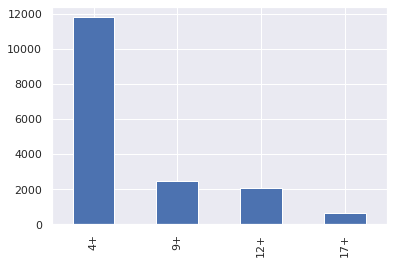

In [69]:
import seaborn as sns
sns.set()
_ = df['age rating'].value_counts().plot(kind='bar') #wykres słupkowy

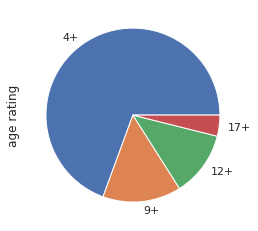

In [70]:
_ = df['age rating'].value_counts().plot(kind='pie')

In [71]:
df['price']

ID
284921427     2.99
284926400     1.99
284946595     0.00
285755462     0.00
285831220     2.99
              ... 
1474626442    0.00
1474919257    0.00
1474962324    0.00
1474963671    0.00
1475076711    0.00
Name: price, Length: 17007, dtype: float64

In [74]:
df['price'].value_counts()

0.00      14212
0.99       1078
1.99        515
2.99        471
4.99        237
3.99        163
9.99         88
11.99        59
5.99         42
6.99         32
179.99       30
7.99         17
8.99         13
19.99         9
14.99         4
12.99         3
16.99         2
29.99         2
139.99        1
99.99         1
37.99         1
36.99         1
18.99         1
59.99         1
Name: price, dtype: int64

In [30]:
df['average user rating']

0        4.0
1        3.5
2        3.0
3        3.5
4        3.5
        ... 
17002    NaN
17003    NaN
17004    NaN
17005    NaN
17006    NaN
Name: average user rating, Length: 17007, dtype: float64

In [29]:
df['average user rating'].value_counts()

4.5    2861
4.0    1722
5.0     990
3.5     925
3.0     514
2.5     317
2.0     158
1.5      60
1.0      14
Name: average user rating, dtype: int64

In [31]:
df.languages

0        DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...
1                                                       EN
2                                                       EN
3        DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...
4        DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...
                               ...                        
17002                                                   EN
17003                                                   EN
17004                                                   EN
17005                                                   EN
17006                                               EN, ZH
Name: languages, Length: 17007, dtype: object

In [32]:
df['languages']

0        DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...
1                                                       EN
2                                                       EN
3        DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...
4        DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...
                               ...                        
17002                                                   EN
17003                                                   EN
17004                                                   EN
17005                                                   EN
17006                                               EN, ZH
Name: languages, Length: 17007, dtype: object

In [33]:
df['languages'].value_counts()

EN                                                                            12467
EN, ZH                                                                          354
CS, NL, EN, FR, DE, IT, JA, KO, PL, PT, RU, ZH, ES, SV, ZH, TR                  277
EN, ZH, ZH                                                                      248
EN, DE                                                                          147
                                                                              ...  
DA, NL, EN, FI, FR, DE, IT, JA, KO, NO, PL, PT, RU, ZH, ES, SV, ZH, TR, UK        1
EN, FR, IT, JA, KO, PT, RU, ES, TR                                                1
DA, NL, EN, FR, DE, IT, NB, PL, PT, ZH, ES, SV, ZH, TR                            1
EN, PT, ZH                                                                        1
AR, NL, EN, FR, DE, ID, IT, JA, KO, PT, RU, ZH, ES, SV, TH, ZH, TR, VI            1
Name: languages, Length: 990, dtype: int64

In [34]:
df.languages.str.split(', ')

0        [DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, P...
1                                                     [EN]
2                                                     [EN]
3        [DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, P...
4        [DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, R...
                               ...                        
17002                                                 [EN]
17003                                                 [EN]
17004                                                 [EN]
17005                                                 [EN]
17006                                             [EN, ZH]
Name: languages, Length: 17007, dtype: object

In [35]:
df.languages.str.split(', ').str.len()

0        17.0
1         1.0
2         1.0
3        17.0
4        15.0
         ... 
17002     1.0
17003     1.0
17004     1.0
17005     1.0
17006     2.0
Name: languages, Length: 17007, dtype: float64

In [36]:
df['num_lang'] = df.languages.str.split(', ').str.len()
df.head()

,id,name,average user rating,user rating count,price,developer,age rating,languages,size,primary genre,genres,original release date,current version release date,num_lang
0,284921427,Sudoku,4.0,3553.0,2.99,Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017,17.0
1,284926400,Reversi,3.5,284.0,1.99,Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018,1.0
2,284946595,Morocco,3.0,8376.0,0.00,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017,1.0
3,285755462,Sudoku (Free),3.5,190394.0,0.00,Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017,17.0
4,285831220,Senet Deluxe,3.5,28.0,2.99,RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018,15.0


In [37]:
df.num_lang.value_counts()

1.0      12566
2.0       1102
3.0        495
16.0       316
4.0        261
5.0        247
6.0        220
25.0       171
9.0        154
11.0       147
8.0        142
7.0        140
10.0       140
31.0       133
12.0        91
21.0        77
14.0        64
13.0        64
15.0        54
17.0        37
30.0        35
19.0        34
32.0        34
33.0        33
22.0        31
18.0        24
46.0        20
26.0        18
20.0        14
24.0        13
23.0        11
27.0        11
28.0         9
29.0         8
45.0         6
44.0         5
65.0         4
42.0         3
43.0         3
36.0         2
49.0         2
48.0         1
66.0         1
35.0         1
34.0         1
111.0        1
76.0         1
Name: num_lang, dtype: int64

Case Study II - Google App Store Data cz. 3 - sprawdzanie braków w danych

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17007 entries, 0 to 17006
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            17007 non-null  int64  
 1   name                          17007 non-null  object 
 2   average user rating           7561 non-null   float64
 3   user rating count             7561 non-null   float64
 4   price                         16983 non-null  float64
 5   developer                     17007 non-null  object 
 6   age rating                    17007 non-null  object 
 7   languages                     16947 non-null  object 
 8   size                          17006 non-null  float64
 9   primary genre                 17007 non-null  object 
 10  genres                        17007 non-null  object 
 11  original release date         17007 non-null  object 
 12  current version release date  17007 non-null  object 
 13  n

In [39]:
df['average user rating'].value_counts()

4.5    2861
4.0    1722
5.0     990
3.5     925
3.0     514
2.5     317
2.0     158
1.5      60
1.0      14
Name: average user rating, dtype: int64

In [40]:
df['average user rating'].value_counts(dropna=False)

NaN    9446
4.5    2861
4.0    1722
5.0     990
3.5     925
3.0     514
2.5     317
2.0     158
1.5      60
1.0      14
Name: average user rating, dtype: int64

In [41]:
df.isnull() #metoda, która sprawdza gdzie jest brak

,id,name,average user rating,user rating count,price,developer,age rating,languages,size,primary genre,genres,original release date,current version release date,num_lang
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17002,False,False,True,True,False,False,False,False,False,False,False,False,False,False
17003,False,False,True,True,False,False,False,False,False,False,False,False,False,False
17004,False,False,True,True,False,False,False,False,False,False,False,False,False,False
17005,False,False,True,True,False,False,False,False,False,False,False,False,False,False


In [42]:
df.isnull().sum()

id                                 0
name                               0
average user rating             9446
user rating count               9446
price                             24
developer                          0
age rating                         0
languages                         60
size                               1
primary genre                      0
genres                             0
original release date              0
current version release date       0
num_lang                          60
dtype: int64

In [43]:
df = df.dropna()
df.isnull().sum()

id                              0
name                            0
average user rating             0
user rating count               0
price                           0
developer                       0
age rating                      0
languages                       0
size                            0
primary genre                   0
genres                          0
original release date           0
current version release date    0
num_lang                        0
dtype: int64

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7537 entries, 0 to 16993
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            7537 non-null   int64  
 1   name                          7537 non-null   object 
 2   average user rating           7537 non-null   float64
 3   user rating count             7537 non-null   float64
 4   price                         7537 non-null   float64
 5   developer                     7537 non-null   object 
 6   age rating                    7537 non-null   object 
 7   languages                     7537 non-null   object 
 8   size                          7537 non-null   float64
 9   primary genre                 7537 non-null   object 
 10  genres                        7537 non-null   object 
 11  original release date         7537 non-null   object 
 12  current version release date  7537 non-null   object 
 13  nu

DataFrame: porównanie do języka SQL cz.1

In [45]:
import numpy as np
import pandas as pd
pd.__version__

'1.3.5'

     Wczytanie danych i processing

In [46]:
url = 'https://storage.googleapis.com/esmartdata-courses-files/ds-bootcamp/online_retail.xlsx'
retail_raw = pd.read_excel(url)
retail_raw.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [47]:
retail = retail_raw.copy()
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [48]:
retail.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [49]:
retail.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [51]:
retail = retail.dropna() #usuwa wszystkie braki danych
retail.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [53]:
retail[retail.Quantity >= 0]
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [54]:
retail.CustomerID = retail.CustomerID.apply(lambda x: str(int(x)))
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.9+ MB


In [55]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


DataFrame: porównanie do języka SQL cz.2

In [56]:
retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


In [58]:
retail[['Quantity', 'UnitPrice', 'CustomerID']]

,Quantity,UnitPrice,CustomerID
0,6,2.55,17850
1,6,3.39,17850
2,8,2.75,17850
3,6,3.39,17850
4,6,3.39,17850
...,...,...,...
541904,12,0.85,12680
541905,6,2.10,12680
541906,4,4.15,12680
541907,4,4.15,12680


In [59]:
retail[['Quantity', 'UnitPrice', 'CustomerID']].head(10)

,Quantity,UnitPrice,CustomerID
0,6,2.55,17850
1,6,3.39,17850
2,8,2.75,17850
3,6,3.39,17850
4,6,3.39,17850
5,2,7.65,17850
6,6,4.25,17850
7,6,1.85,17850
8,6,1.85,17850
9,32,1.69,13047


In [60]:
retail[['Quantity', 'UnitPrice', 'CustomerID']][:10]

,Quantity,UnitPrice,CustomerID
0,6,2.55,17850
1,6,3.39,17850
2,8,2.75,17850
3,6,3.39,17850
4,6,3.39,17850
5,2,7.65,17850
6,6,4.25,17850
7,6,1.85,17850
8,6,1.85,17850
9,32,1.69,13047


In [62]:
retail[retail.CustomerID == '17850'] # wycina nam konkretny wers

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
86898,C543611,82483,WOOD 2 DRAWER CABINET WHITE FINISH,-1,2011-02-10 14:38:00,4.95,17850,United Kingdom
86899,C543611,21874,GIN AND TONIC MUG,-1,2011-02-10 14:38:00,1.06,17850,United Kingdom
86900,C543611,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,-2,2011-02-10 14:38:00,2.75,17850,United Kingdom
86901,C543611,82483,WOOD 2 DRAWER CABINET WHITE FINISH,-1,2011-02-10 14:38:00,4.95,17850,United Kingdom


In [63]:
retail.query('CustomerID == "17850"') # wycina nam konkretny wers

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
86898,C543611,82483,WOOD 2 DRAWER CABINET WHITE FINISH,-1,2011-02-10 14:38:00,4.95,17850,United Kingdom
86899,C543611,21874,GIN AND TONIC MUG,-1,2011-02-10 14:38:00,1.06,17850,United Kingdom
86900,C543611,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,-2,2011-02-10 14:38:00,2.75,17850,United Kingdom
86901,C543611,82483,WOOD 2 DRAWER CABINET WHITE FINISH,-1,2011-02-10 14:38:00,4.95,17850,United Kingdom


In [64]:
retail[(retail.CustomerID == '17850') & (retail.UnitPrice > 5)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom
58,536373,82486,WOOD S/3 CABINET ANT WHITE FINISH,4,2010-12-01 09:02:00,6.95,17850,United Kingdom
63,536373,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 09:02:00,7.65,17850,United Kingdom
75,536375,82486,WOOD S/3 CABINET ANT WHITE FINISH,4,2010-12-01 09:32:00,6.95,17850,United Kingdom
80,536375,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 09:32:00,7.65,17850,United Kingdom
288,536396,82486,WOOD S/3 CABINET ANT WHITE FINISH,4,2010-12-01 10:51:00,6.95,17850,United Kingdom
293,536396,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 10:51:00,7.65,17850,United Kingdom
294,536396,22803,IVORY EMBROIDERED QUILT,2,2010-12-01 10:51:00,35.75,17850,United Kingdom
425,536406,82486,WOOD S/3 CABINET ANT WHITE FINISH,4,2010-12-01 11:33:00,6.95,17850,United Kingdom
430,536406,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 11:33:00,7.65,17850,United Kingdom


In [65]:
retail[(retail.CustomerID == '17850') | (retail.Country == 'France')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


In [67]:
retail[retail.InvoiceNo.notnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


DataFrame: porównanie do języka SQL cz.3

In [68]:
retail.groupby('CustomerID').size() #select CustomerID

CustomerID
12346      2
12347    182
12348     31
12349     73
12350     17
        ... 
18280     10
18281      7
18282     13
18283    756
18287     70
Length: 4372, dtype: int64

In [71]:
retail.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom


In [73]:
retail['Revenue'] = retail.Quantity = retail.UnitPrice
retail.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2.55,2010-12-01 08:26:00,2.55,17850,United Kingdom,2.55
1,536365,71053,WHITE METAL LANTERN,3.39,2010-12-01 08:26:00,3.39,17850,United Kingdom,3.39
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,2.75,2010-12-01 08:26:00,2.75,17850,United Kingdom,2.75


In [74]:
retail.groupby('CustomerID').aggregate({'Revenue': np.mean, 'CustomerID': np.size})

,Revenue,CustomerID
CustomerID,,
12346,1.040000,2
12347,2.644011,182
12348,5.764839,31
12349,8.289041,73
12350,3.841176,17
...,...,...
18280,4.765000,10
18281,5.622857,7
18282,4.821538,13


In [82]:
retail.groupby('CustomerID').aggregate({'Revenue': np.mean, 'CustomerID': np.size}). \
    rename(columns={'Revenue': 'RevenueAverage', 'CustomerID': 'CustomerIDCount'})

,RevenueAverage,CustomerIDCount
CustomerID,,
12346,1.040000,2
12347,2.644011,182
12348,5.764839,31
12349,8.289041,73
12350,3.841176,17
...,...,...
18280,4.765000,10
18281,5.622857,7
18282,4.821538,13


In [83]:
retail.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2.55,2010-12-01 08:26:00,2.55,17850,United Kingdom,2.55
1,536365,71053,WHITE METAL LANTERN,3.39,2010-12-01 08:26:00,3.39,17850,United Kingdom,3.39


In [84]:
retail['InvoiceDateDay'] = retail.InvoiceDate.dt.day
retail.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,InvoiceDateDay
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2.55,2010-12-01 08:26:00,2.55,17850,United Kingdom,2.55,1
1,536365,71053,WHITE METAL LANTERN,3.39,2010-12-01 08:26:00,3.39,17850,United Kingdom,3.39,1


In [87]:
results = retail.groupby('InvoiceDateDay').aggregate({'Revenue': np.sum}) 
results
# SELECT InvoiceDateDay, sumn(Revenue) FROM retail GROUP BY InvoiceDateDay

,Revenue
InvoiceDateDay,
1,44360.570
2,38293.360
3,62643.070
4,56527.260
5,54079.850
6,55486.200
7,48089.560
8,54509.420
9,41759.210


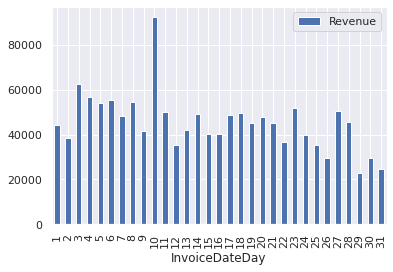

In [90]:
import seaborn as sns
sns.set()

results.plot(kind='bar')

In [91]:
#SELECT * FROM retail ORDER BY Quantity DESC LIMIT 5;
retail.nlargest(n=5, columns='Quantity')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,InvoiceDateDay
222681,C556445,M,Manual,38970.00,2011-06-10 15:31:00,38970.00,15098,United Kingdom,38970.00,10
173277,C551685,POST,POSTAGE,8142.75,2011-05-03 12:51:00,8142.75,16029,United Kingdom,8142.75,3
173382,551697,POST,POSTAGE,8142.75,2011-05-03 13:46:00,8142.75,16029,United Kingdom,8142.75,3
173391,C551699,M,Manual,6930.00,2011-05-03 14:12:00,6930.00,16029,United Kingdom,6930.00,3
268027,C560372,M,Manual,4287.63,2011-07-18 12:26:00,4287.63,17448,United Kingdom,4287.63,18


In [92]:
# SELECT * FROM retail ORDER BY Quantity LIMIT 5;
retail.nsmallest(n=5, columns='Quantity')


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,InvoiceDateDay
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,0.0,2010-12-05 14:02:00,0.0,12647,Germany,0.0,5
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,0.0,2010-12-16 14:36:00,0.0,16560,United Kingdom,0.0,16
40089,539722,22423,REGENCY CAKESTAND 3 TIER,0.0,2010-12-21 13:45:00,0.0,14911,EIRE,0.0,21
47068,540372,22090,PAPER BUNTING RETROSPOT,0.0,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0,6
47070,540372,22553,PLASTERS IN TIN SKULLS,0.0,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0,6
